In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import regex as re
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani.formatters import percent_format
from plotnine import *
import ast
import re

warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('barca4.csv.gz')

In [3]:
data.shape

(18925, 75)

In [4]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.892500e+04,1.892500e+04,1.892500e+04,18923.000000,18923.000000,18925.000000,18925.000000,18925.000000,15182.000000,17043.000000,...,14117.000000,14115.000000,14118.000000,14115.000000,14116.000000,18925.000000,18925.000000,18925.000000,18925.000000,14138.000000
mean,4.264342e+17,2.024062e+13,1.836183e+08,53.785499,67.504624,41.392151,2.167022,3.335324,1.402681,1.797160,...,4.614694,4.725212,4.726785,4.751971,4.467296,39.496380,28.096116,11.267371,0.083487,1.523345
std,4.753867e+17,6.015784e+00,1.865344e+08,124.219964,143.828653,0.014240,0.017629,2.161128,0.830705,1.225817,...,0.482940,0.447504,0.451375,0.362439,0.536958,83.712375,70.090597,50.289047,0.733232,2.026505
min,1.867400e+04,2.024062e+13,3.073000e+03,1.000000,1.000000,41.350673,2.085593,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.432737e+07,2.024062e+13,1.054730e+07,2.000000,3.000000,41.380968,2.156540,2.000000,1.000000,1.000000,...,4.500000,4.670000,4.670000,4.670000,4.320000,1.000000,0.000000,0.000000,0.000000,0.230000
50%,5.195642e+07,2.024062e+13,1.168441e+08,7.000000,9.000000,41.389758,2.167993,3.000000,1.000000,1.000000,...,4.750000,4.860000,4.860000,4.850000,4.580000,5.000000,2.000000,0.000000,0.000000,0.880000
75%,9.202254e+17,2.024062e+13,3.463675e+08,37.000000,54.000000,41.401690,2.177690,4.000000,2.000000,2.000000,...,4.930000,5.000000,5.000000,5.000000,4.780000,31.000000,19.000000,2.000000,0.000000,2.270000
max,1.178911e+18,2.024062e+13,5.820441e+08,814.000000,2108.000000,41.458092,2.227710,16.000000,50.000000,50.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,406.000000,406.000000,351.000000,12.000000,70.470000


In [5]:
print(data.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
data.drop(["scrape_id", "source", 'description',  'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about','bathrooms_text',
        'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'license', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications' ], axis=1, inplace=True)
# dropping unneccesaary columns

In [7]:
data['beds'].describe()

count    15087.000000
mean         2.299596
std          2.234019
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        127.000000
Name: beds, dtype: float64

In [8]:
data.shape

(18925, 46)

In [9]:
data["price"] = data["price"].str.replace("$", "")

In [10]:
data["price"] = data["price"].str.replace(",", "").astype("float")

In [11]:
data['price'].describe()

count    15189.000000
mean       196.379419
std        327.988747
min         10.000000
25%         70.000000
50%        136.000000
75%        248.000000
max      13714.000000
Name: price, dtype: float64

In [12]:
data.shape

(18925, 46)

In [13]:
for g in data.columns:
    if "reviews" in g:
        print(g)


number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
reviews_per_month


In [14]:
data.room_type.value_counts()


room_type
Entire home/apt    11217
Private room        7436
Shared room          151
Hotel room           121
Name: count, dtype: int64

In [15]:
## Create Numerical variables
#data["usd_price_day"] = data["price"]
#data["p_host_response_rate"] = data["host_response_rate"].astype("float")
data["p_host_response_rate"] = data["host_response_rate"].str.rstrip("%").astype(float)


In [16]:
for column in (
    "accommodates",
    "bathrooms",
    "review_scores_rating",
    "number_of_reviews",
    "reviews_per_month",
    "minimum_nights",
    "beds",
):
    data["n_" + re.sub(r"[^[:alnum:]_]", "", column.lower())] = data[column].astype(
        "float"
    )

In [17]:
data.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'p_h

In [18]:
data.drop(["accommodates",
    "bathrooms",
    "review_scores_rating",
    "number_of_reviews",
    "reviews_per_month",
    "minimum_nights",
    "beds", ], axis=1, inplace=True)
# dropping those same columns

In [19]:
data["n_days_since"] = pd.to_datetime(
    data["calendar_last_scraped"], format="%Y-%m-%d"
) - pd.to_datetime(data["first_review"], format="%Y-%m-%d")
# Previous row creates a timedelta object in each row. Get the elapsed number of days like:
data["n_days_since"] = [x.days for x in data["n_days_since"]]


In [20]:
data.shape

(18925, 48)

In [21]:
data.isnull().sum().loc[lambda x: x > 0]

host_response_time              2895
host_response_rate              2895
host_acceptance_rate            2742
host_is_superhost                124
host_has_profile_pic               2
host_identity_verified             2
neighbourhood                   8762
bedrooms                        1882
price                           3736
calendar_updated               18925
has_availability                1050
first_review                    4787
last_review                     4787
review_scores_accuracy          4809
review_scores_cleanliness       4808
review_scores_checkin           4810
review_scores_communication     4807
review_scores_location          4810
review_scores_value             4809
p_host_response_rate            2895
n_bathrooms                     3743
n_review_scores_rating          4787
n_reviews_per_month             4787
n_beds                          3838
n_days_since                    4787
dtype: int64

In [22]:
data.drop(["host_response_time",
    "host_response_rate",
    "calendar_updated",
    "neighbourhood",
    "first_review",
 "last_review", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin",         
"review_scores_communication",
"review_scores_location",
"review_scores_value"
  ], axis=1, inplace=True)

In [23]:
data.isnull().sum().loc[lambda x: x > 0]

host_acceptance_rate      2742
host_is_superhost          124
host_has_profile_pic         2
host_identity_verified       2
bedrooms                  1882
price                     3736
has_availability          1050
p_host_response_rate      2895
n_bathrooms               3743
n_review_scores_rating    4787
n_reviews_per_month       4787
n_beds                    3838
n_days_since              4787
dtype: int64

In [24]:
# Convert the amenities column from string representation of lists to actual lists
data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

In [25]:
data['amenities'].describe()

count                                                 18925
unique                                                16309
top       [Cleaning products, Kitchen, Washer, Dishes an...
freq                                                    140
Name: amenities, dtype: object

In [26]:
# Convert amenities from string to list
data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Define category mapping dictionary
category_map = {
    'Internet': r'(wifi|ethernet|pocket wifi|internet)',
    'Kitchen': r'(kitchen|refrigerator|microwave|oven|stove|dishwasher|toaster|coffee maker|cooking basics|dishes)',
    'Laundry': r'(washer|dryer|laundry)',
    'Safety': r'(smoke alarm|fire extinguisher|carbon monoxide alarm|first aid kit|security camera)',
    'Heating_Cooling': r'(air conditioning|heating|central heating|portable fan|ceiling fan)',
    'Essentials': r'(essentials|shampoo|conditioner|body soap|toilet paper|towels|hair dryer)',
    'Parking': r'(parking|garage|driveway|carport)',
    'Entertainment': r'(tv|television|hdtv|netflix|roku|chromecast|sound system)',
    'Workspace': r'(dedicated workspace|desk|office)',
    'Family': r'(crib|high chair|baby safety|toys|children’s books)',
    'Outdoor': r'(patio|balcony|garden|bbq|grill|backyard)',
    'Luxury': r'(hot tub|sauna|pool|gym|concierge)'
}

In [27]:
def categorize_amenity(amenity):
    """Categorize individual amenity into broader groups"""
    # Handle null values and convert to string
    if pd.isna(amenity) or not isinstance(amenity, str):
        return 'Other'
    
    # Clean special characters and normalize
    cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', amenity).lower()
    
    for category, pattern in category_map.items():
        if re.search(pattern, cleaned, re.IGNORECASE):
            return category
    return 'Other'

# Create mapping of all unique amenities to categories (with null handling)
unique_amenities = data['amenities'].explode().dropna().unique()

amenity_category_mapping = {amenity: categorize_amenity(amenity) for amenity in unique_amenities}

In [28]:
# Create category dummy variables
def create_category_dummies(amenities_list):
    categories = set()
    for amenity in amenities_list:
        categories.add(amenity_category_mapping.get(amenity, 'Other'))
    return {category: 1 for category in categories}

# Apply to each row and convert to DataFrame
category_dummies = data['amenities'].apply(create_category_dummies).apply(pd.Series).fillna(0)

# Combine with original data
data = pd.concat([data, category_dummies], axis=1)

# Optional: Remove original amenities column
data.drop('amenities', axis=1, inplace=True)

# Show results
print(data[list(category_map.keys()) + ['Other']].head())

   Internet  Kitchen  Laundry  Safety  Heating_Cooling  Essentials  Parking  \
0       1.0      1.0      1.0     0.0              1.0         1.0      0.0   
1       1.0      1.0      1.0     0.0              0.0         0.0      0.0   
2       1.0      1.0      1.0     0.0              1.0         1.0      1.0   
3       1.0      1.0      1.0     1.0              1.0         1.0      0.0   
4       1.0      1.0      1.0     1.0              1.0         1.0      1.0   

   Entertainment  Workspace  Family  Outdoor  Luxury  Other  
0            1.0        1.0     0.0      1.0     0.0    1.0  
1            1.0        0.0     0.0      0.0     0.0    1.0  
2            1.0        0.0     1.0      1.0     0.0    1.0  
3            1.0        0.0     1.0      1.0     0.0    1.0  
4            1.0        1.0     0.0      1.0     0.0    1.0  


In [29]:
data.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'bedrooms', 'price',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'instant_bookable', 'p_host_response_rate',
       'n_accommodates', 'n_bathrooms', 'n_review_scores_rating',
       'n_number_of_reviews', 'n_reviews_per_month', 'n_minimum_nights',
       'n_beds', 'n_days_since', 'Essentials', 'Workspace', 'Heating_Cooling',
       'Internet', 'Outdoor', 'Entertainment', 'Other', 'Kitchen', 'Laundry',
       'Parking', 'Family', 'Safety', 'Luxury'],
      dtype='object')

In [30]:
# with price info only
data = data.dropna(subset=["price"])

In [31]:
data.shape


(15189, 48)

In [32]:
data.isnull().sum().loc[lambda x: x > 0]

host_acceptance_rate       607
host_is_superhost          119
bedrooms                    10
has_availability            89
p_host_response_rate       633
n_bathrooms                  7
n_review_scores_rating    3317
n_reviews_per_month       3317
n_beds                     102
n_days_since              3317
dtype: int64

In [33]:
for var in ["flag_days_since","flag_review_scores_rating","flag_reviews_per_month"]:
    data[var]=[int(x) for x in data[var.replace('flag','n')].isna()]

In [34]:
data['flag_review_scores_rating'].sum()

3317

In [35]:
data = data.drop(["p_host_response_rate"],axis=1)

In [36]:
data["host_is_superhost"] = data["host_is_superhost"].fillna("0")          
data["has_availability"] = data["has_availability"].fillna("1")

# Remove '%' and convert to float
data["host_acceptance_rate"] = data["host_acceptance_rate"].str.rstrip('%').astype(float)

data["host_acceptance_rate"] = data["host_acceptance_rate"].fillna(np.nanmedian(data["host_acceptance_rate"]))
data["n_review_scores_rating"] = data["n_review_scores_rating"].fillna(np.nanmedian(data["n_review_scores_rating"]))
data["n_reviews_per_month"] = data["n_reviews_per_month"].fillna(np.nanmedian(data["n_reviews_per_month"]))
data["n_days_since"] = data["n_days_since"].fillna(np.nanmedian(data["n_days_since"]))
data["bedrooms"] = data["bedrooms"].fillna(np.nanmedian(data["bedrooms"]))
data["n_bathrooms"] = data["n_bathrooms"].fillna(np.nanmedian(data["n_bathrooms"]))
data["n_beds"] = data["n_beds"].fillna(data["n_accommodates"])


In [37]:
data.isnull().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

In [38]:
print(data["price"].describe())

count    15189.000000
mean       196.379419
std        327.988747
min         10.000000
25%         70.000000
50%        136.000000
75%        248.000000
max      13714.000000
Name: price, dtype: float64


In [39]:
percentile_995 = data["price"].quantile(0.995)
print(percentile_995)

1314.5399999999954


In [40]:
# Remove extreme values + missing from prices (this case: only 3 missing values)
data = data.loc[data.price < 1071]


In [41]:
data.shape

(15063, 50)

In [42]:
data["ln_price"] = np.log(data.price)

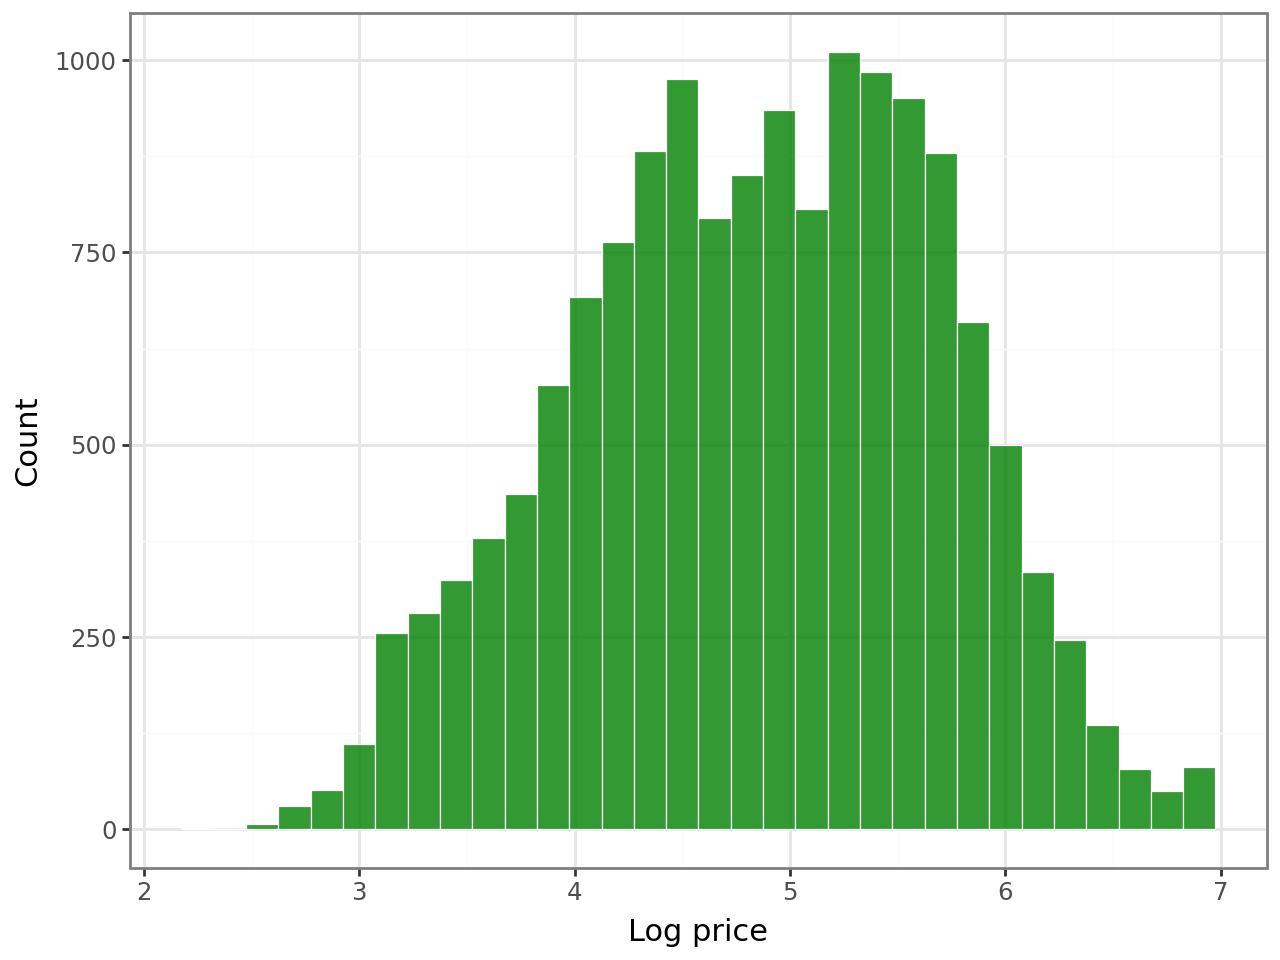

In [43]:
# Histograms
(
    ggplot(data, aes("ln_price"))
    + geom_histogram(
        binwidth=0.15, fill='green', color="white", alpha=0.8, size=0.25, closed="left"
    )
    + ylab("Count")
    + xlab("Log price")
    + theme_bw()
)


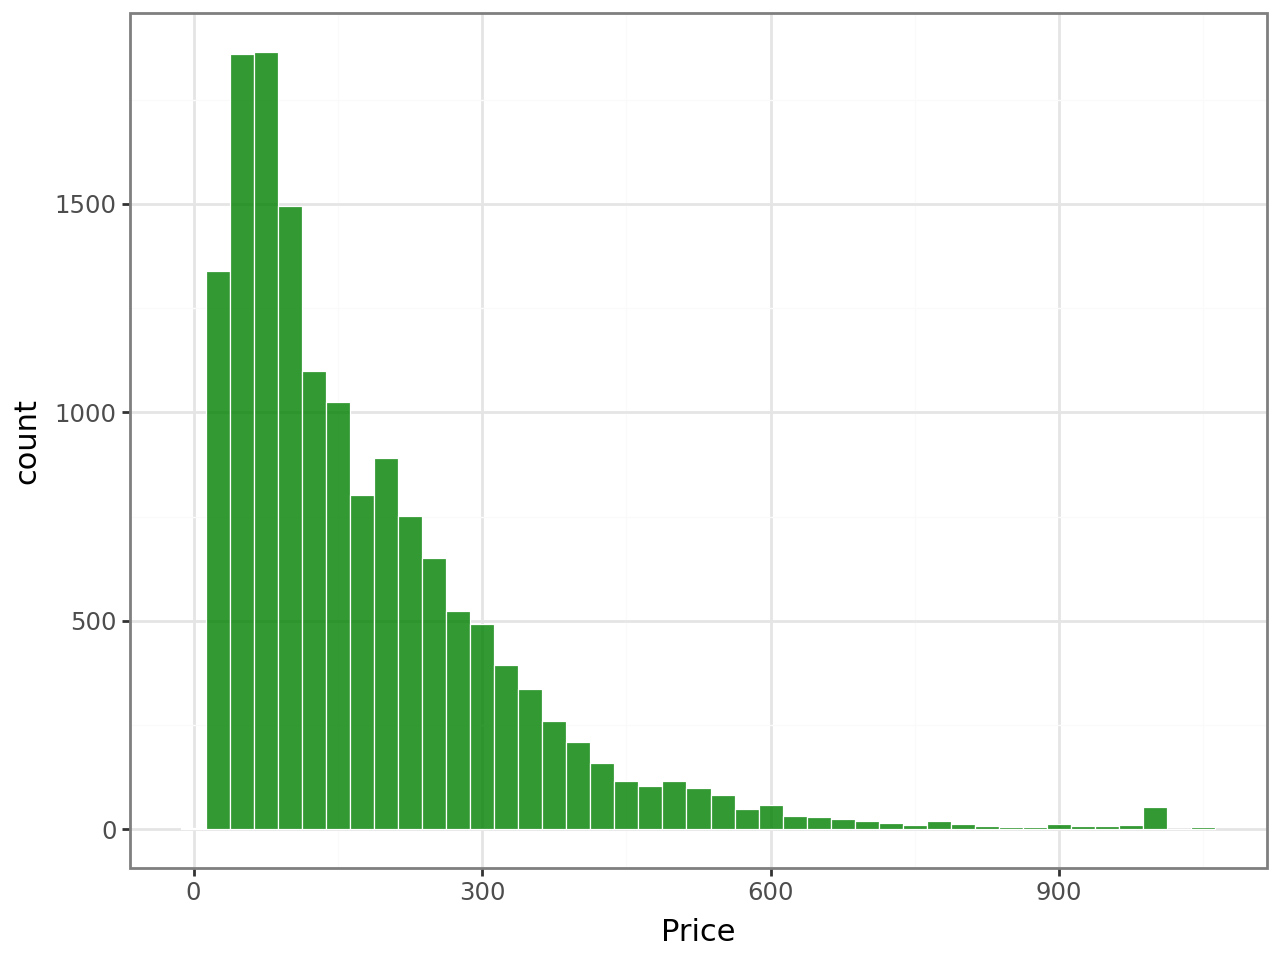

In [44]:
(
    ggplot(data, aes("price"))
    + geom_histogram(
        binwidth=25, fill='green', color="white", alpha=0.8, size=0.25, closed="left"
    )
    + ylab("count")
    + xlab("Price")
    + theme_bw()
)


In [45]:
data.groupby("n_accommodates").agg(
    mean_price=("price", np.mean),
    min_price=("price", np.min),
    max_price=("price", np.max),
    n=("price", "size"),
)


,mean_price,min_price,max_price,n
n_accommodates,,,,
1.0,50.359512,10.0,800.0,2050
2.0,120.846707,10.0,1000.0,4312
3.0,150.764748,19.0,1000.0,1407
4.0,202.040870,18.0,1000.0,3401
5.0,239.189310,28.0,1000.0,1347
6.0,279.117959,12.0,1000.0,1509
7.0,308.692833,52.0,1000.0,293
8.0,385.565820,47.0,1002.0,433
9.0,448.536232,19.0,1039.0,69


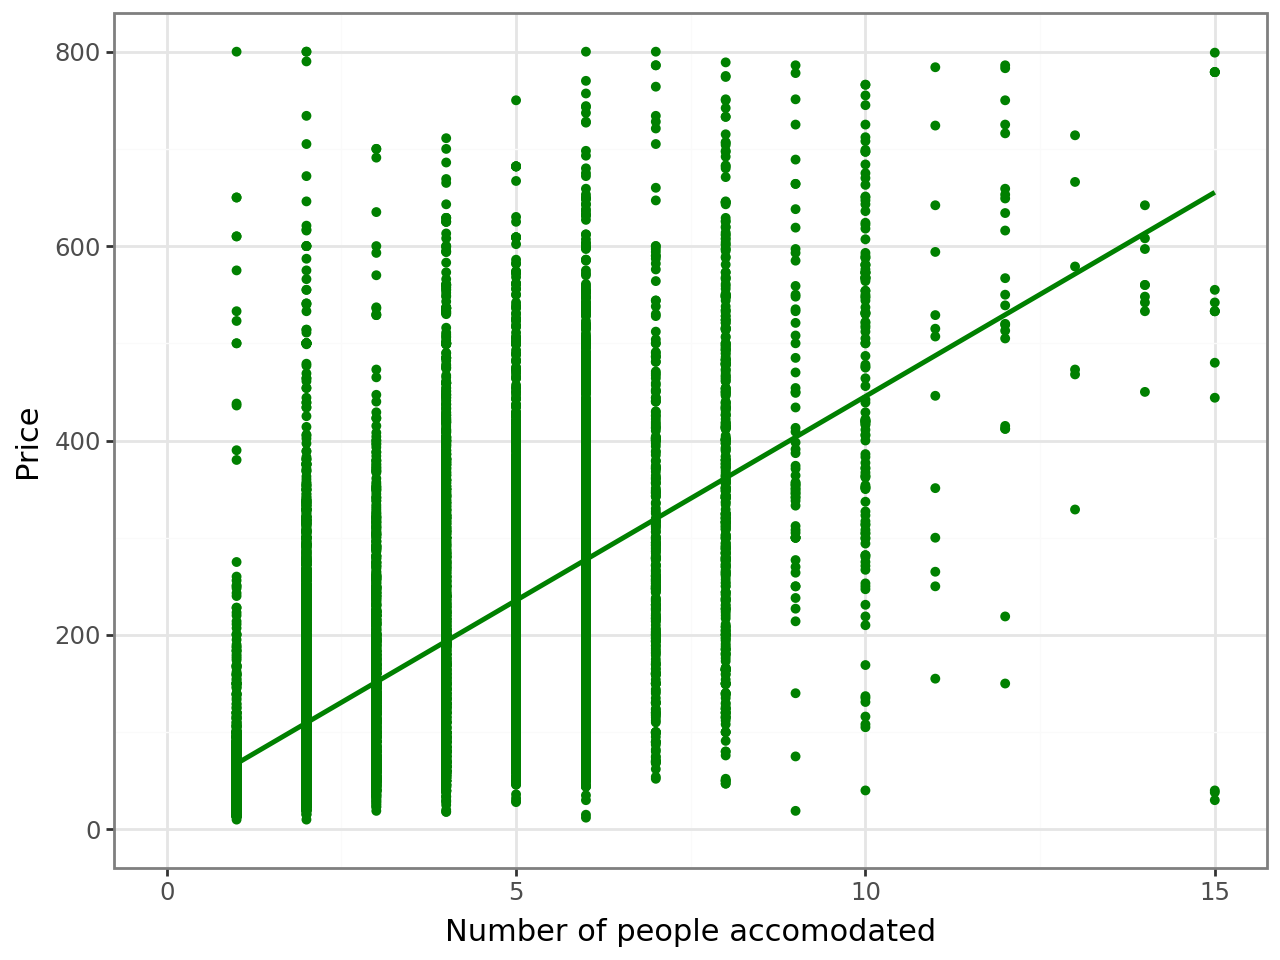

In [46]:
(
    ggplot(data, aes(x="n_accommodates", y="price"))
    + geom_point(size=1, colour='green')
    + ylim(0, 800)
    + xlim(0, 15)
    + labs(x="Number of people accomodated", y="Price")
    + geom_smooth(method="lm", colour='green', se=False)
    + theme_bw()
)


In [47]:
data["n_accommodates2"] = data["n_accommodates"] ** 2
data["ln_accommodates"] = np.log(data["n_accommodates"])
data["ln_accommodates2"] = data["ln_accommodates"] ** 2

In [48]:
# Regression 1: ln price and num of accomodates and squares
smf.ols(
    formula="ln_price ~ n_accommodates + n_accommodates2", data=data
).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     6467.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:37:58   Log-Likelihood:                -14136.
No. Observations:               15063   AIC:                         2.828e+04
Df Residuals:                   15060   BIC:                         2.830e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5384      0.015    237.556      0.000       3.509       3.568
n_accommodates      0.4820      0.007     72.179      0.000       0.469       0.495
n_accommodates2    -0.0229      0.001    -35.599      0.000      -0.024      -0.022
==============================================================================
Omnibus:                      114.319   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.384
Skew:                           0.140   Prob(JB):                     3.28e-31
Kurtosis:                       3.381   Cond. No.                         88.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Regression 2: ln price and log num of accomodates

smf.ols(formula="ln_price ~ ln_accommodates", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                 1.437e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:37:58   Log-Likelihood:                -13758.
No. Observations:               15063   AIC:                         2.752e+04
Df Residuals:                   15061   BIC:                         2.754e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.8122      0.010    382.041      0.000       3.793       3.832
ln_accommodates     0.9607      0.008    119.890      0.000       0.945       0.976
==============================================================================
Omnibus:                      154.338   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.653
Skew:                           0.116   Prob(JB):                     1.00e-49
Kurtosis:                       3.553   Cond. No.                         3.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Regression 3: ln price and num of accomodates
smf.ols(formula="ln_price ~ n_accommodates", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 1.076e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:37:58   Log-Likelihood:                -14744.
No. Observations:               15063   AIC:                         2.949e+04
Df Residuals:                   15061   BIC:                         2.951e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9351      0.010    382.421      0.000       3.915       3.955
n_accommodates     0.2603      0.003    103.738      0.000       0.255       0.265
==============================================================================
Omnibus:                       85.580   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.243
Skew:                           0.013   Prob(JB):                     6.37e-28
Kurtosis:                       3.446   Cond. No.                         8.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
data.groupby("n_beds").agg(
    mean_price=("price", np.mean),
    min_price=("price", np.min),
    max_price=("price", np.max),
    n=("price", "size"),
)


,mean_price,min_price,max_price,n
n_beds,,,,
0.0,125.077581,10.0,1000.0,1753
1.0,104.891020,10.0,1039.0,4744
2.0,171.888338,17.0,1000.0,3027
3.0,222.757664,17.0,1000.0,2414
4.0,249.145234,12.0,1000.0,1563
5.0,300.213499,15.0,1000.0,726
6.0,318.924945,26.0,1051.0,453
7.0,379.554974,19.0,1047.0,191
8.0,459.261905,18.0,1060.0,84


In [52]:
# maybe best is to have log beds
data["ln_beds"] = np.log(data["n_beds"])


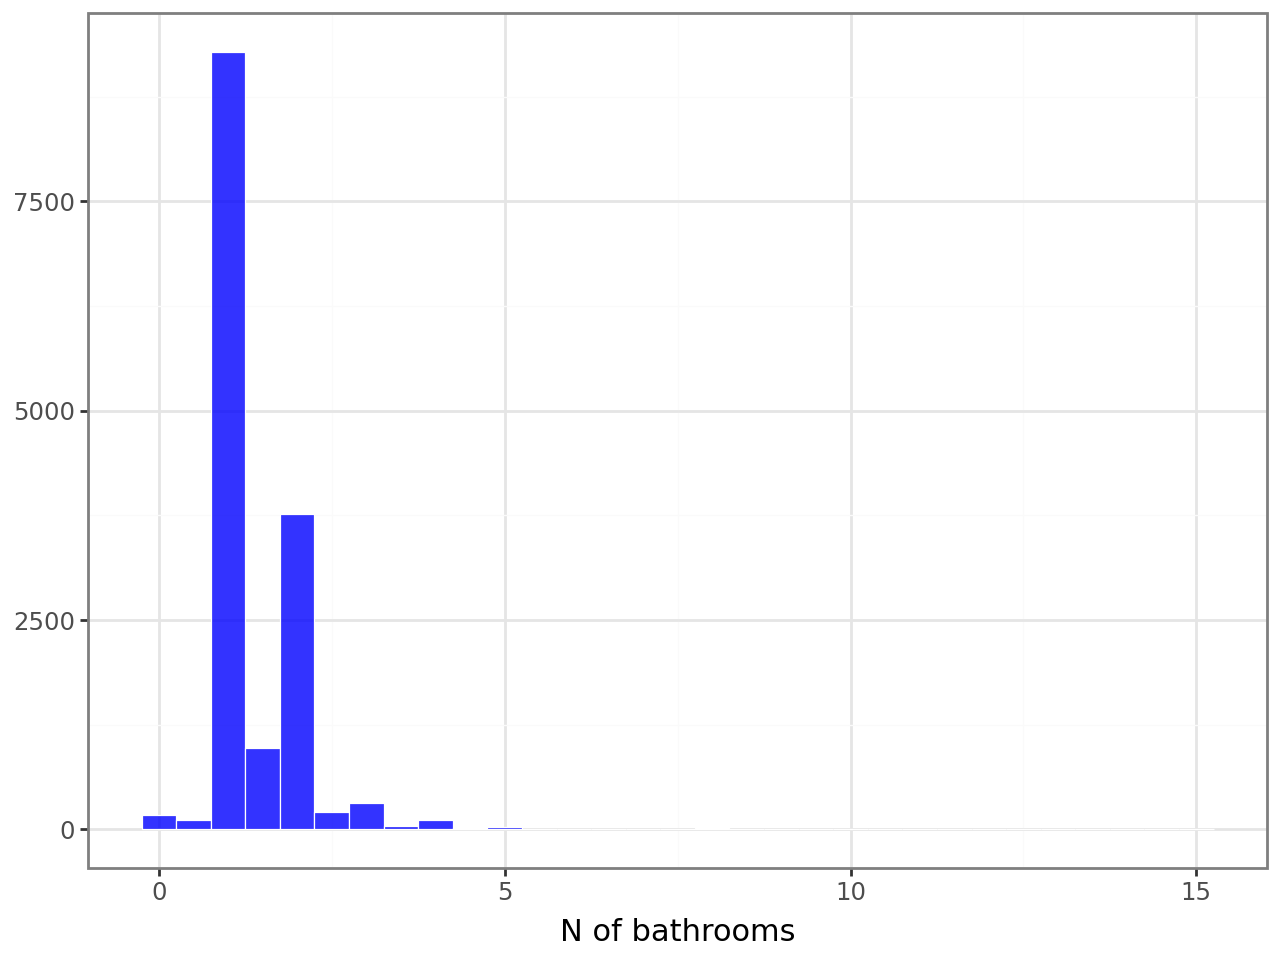

In [53]:
## bathrooms
(
    ggplot(data, aes("n_bathrooms"))
    + geom_histogram(
        binwidth=0.5, closed="left", fill='blue', color="white", alpha=0.8, size=0.25
    )
    + ylab("")
    + xlab("N of bathrooms")
    + theme_bw()
)


In [54]:
bins = [0, 1, 2, 10]
labels = [0, 1, 2]

data['f_bathroom'] = pd.cut(data['n_bathrooms'], bins=bins, labels=labels, right=False)

In [55]:
data["n_bathrooms"].dtype

dtype('float64')

In [56]:
data.groupby("f_bathroom").agg(mean_price=("price", np.mean), n=("price", "size"))

,mean_price,n
f_bathroom,,
0,161.740351,285
1,151.086126,10264
2,242.545434,4512


In [57]:
## Number of reviews
nreview_plot = data.loc[data.n_number_of_reviews < 100]


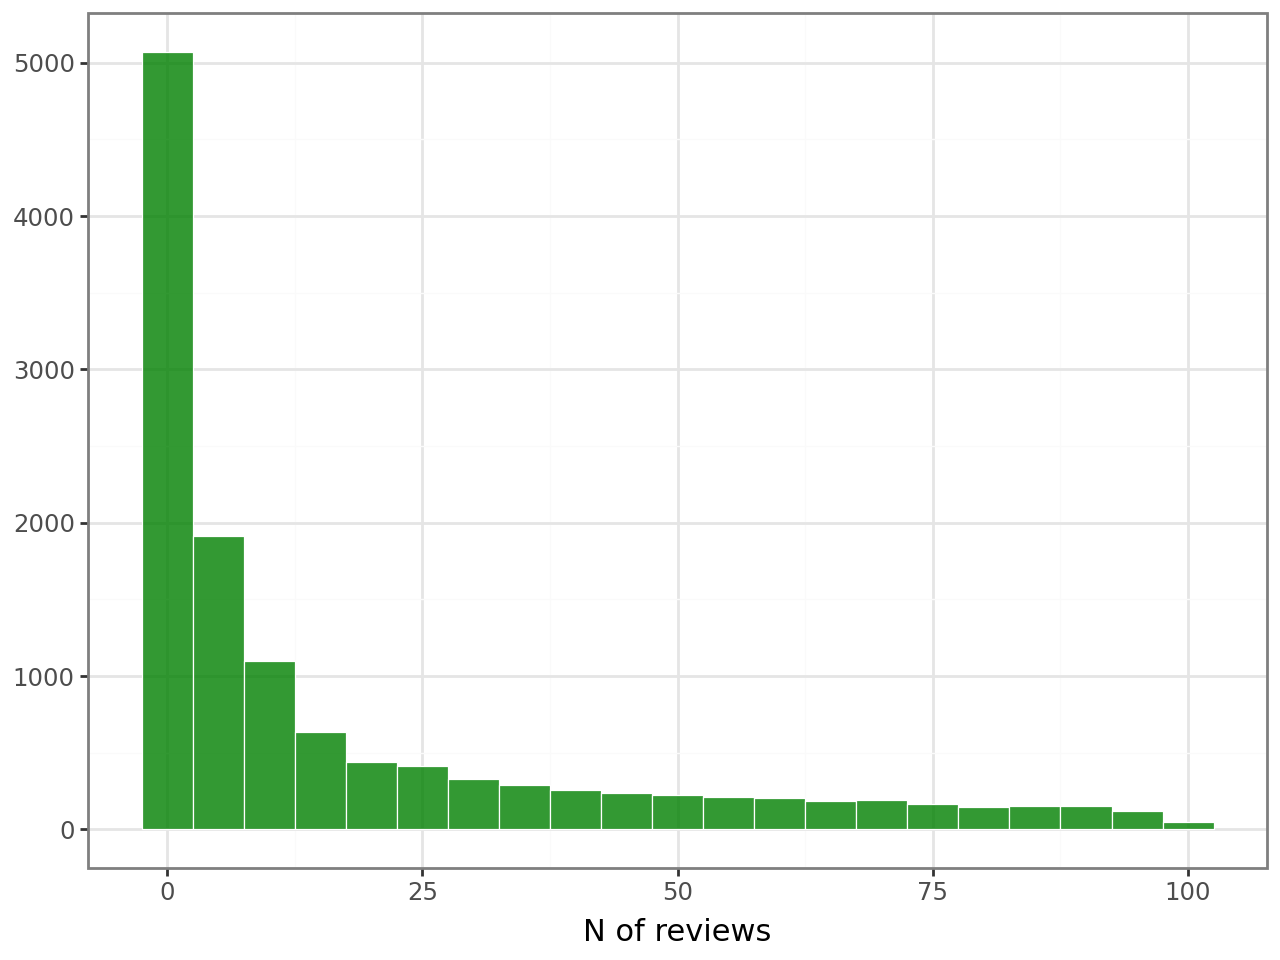

In [58]:
(
    ggplot(nreview_plot, aes("n_number_of_reviews"))
    + geom_histogram(binwidth=5, fill='green', color="white", alpha=0.8, size=0.25)
    + ylab("")
    + xlab("N of reviews")
    + theme_bw()
)


In [59]:
# number of reviews: use logs as well
data["ln_number_of_reviews"] = np.log(data["n_number_of_reviews"] + 1)


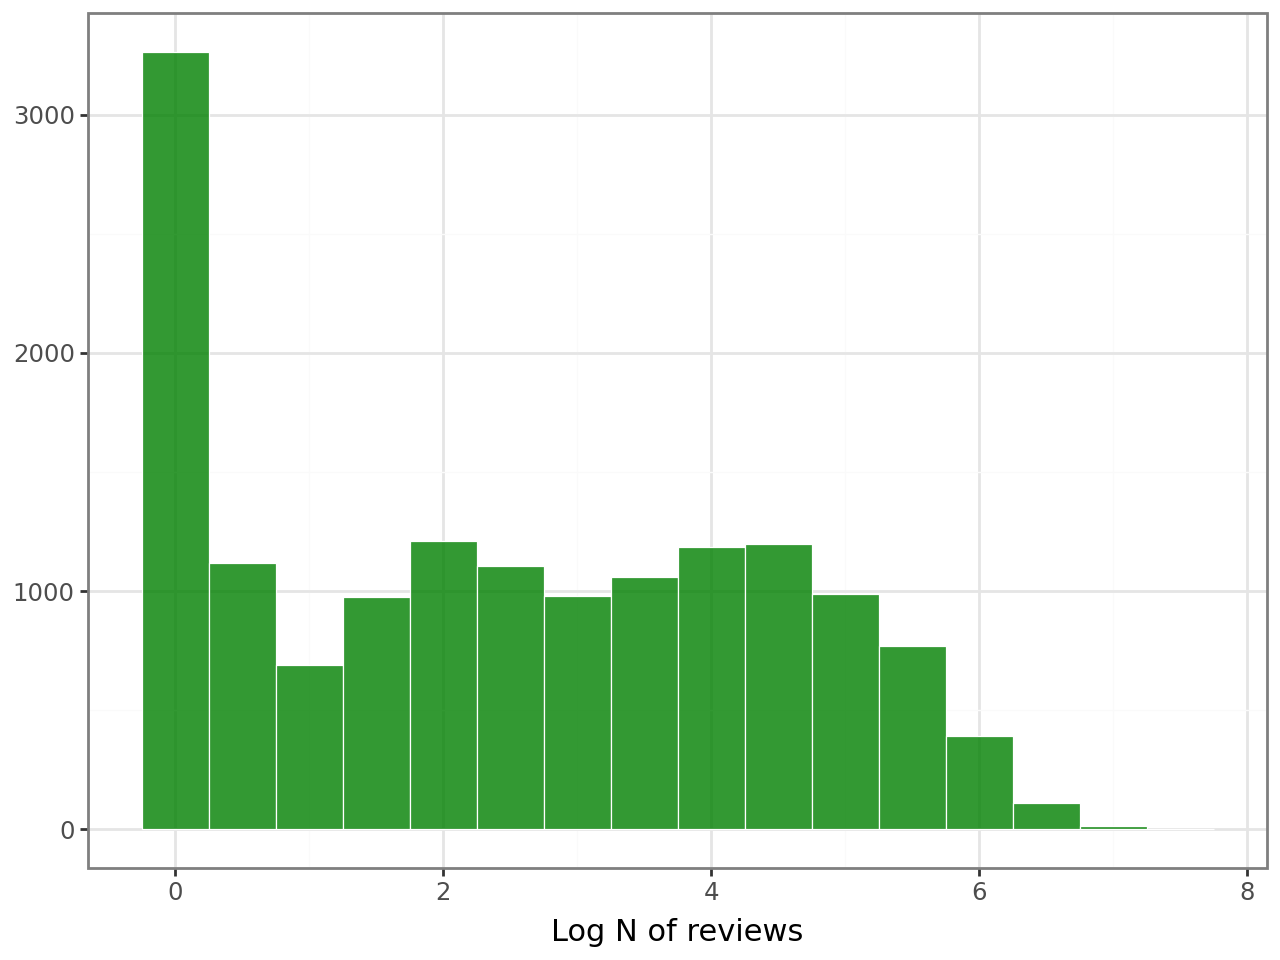

In [60]:
(
    ggplot(data, aes("ln_number_of_reviews"))
    + geom_histogram(binwidth=0.5, fill='green', color="white", alpha=0.8, size=0.25)
    + ylab("")
    + xlab("Log N of reviews")
    + theme_bw()
)


In [61]:
bins = [0,1,51,max(data.n_number_of_reviews)]
labels = [0,1,2]
data["f_number_of_reviews"] = pd.cut(data["n_number_of_reviews"],bins = bins, labels = labels, right = False)

In [62]:
data.groupby("f_number_of_reviews").agg(
    median_price=("price", np.median),
    mean_price=("price", np.mean),
    n=("price", "size"),
)


,median_price,mean_price,n
f_number_of_reviews,,,
0,90.0,136.733762,3264
1,110.0,162.058240,7555
2,220.0,240.573179,4243


In [63]:
# Regression 1: log-price and number of reviews
smf.ols(formula="ln_price ~ f_number_of_reviews", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     930.9
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:38:00   Log-Likelihood:                -17926.
No. Observations:               15062   AIC:                         3.586e+04
Df Residuals:                   15059   BIC:                         3.588e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.5050      0.014    323.521      0.000       4.478       4.532
f_number_of_reviews[T.1]     0.2659      0.017     15.955      0.000       0.233       0.299
f_number_of_reviews[T.2]     0.7634      0.019     41.214      0.000       0.727       0.800
==============================================================================
Omnibus:                       17.092   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.776
Skew:                          -0.046   Prob(JB):                     0.000375
Kurtosis:                       2.871   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Regression 2: log-price and log number of reviews
smf.ols(formula="ln_price ~ ln_number_of_reviews", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     2124.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:38:00   Log-Likelihood:                -17811.
No. Observations:               15063   AIC:                         3.563e+04
Df Residuals:                   15061   BIC:                         3.564e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.4712      0.010    426.019      0.000       4.451       4.492
ln_number_of_reviews     0.1547      0.003     46.082      0.000       0.148       0.161
==============================================================================
Omnibus:                        3.427   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                3.399
Skew:                          -0.025   Prob(JB):                        0.183
Kurtosis:                       2.945   Cond. No.                         5.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
## Time since
# Create variables, measuring the time since: squared, cubic, logs
for var in [
    "ln_days_since",
    "ln_days_since2",
    "ln_days_since3",
    "n_days_since2",
    "n_days_since3",
]:
    if var[:2] == "ln":
        try:
            data[var] = np.log(data["n_days_since"]) ** int(var[-1])
        except ValueError:
            data[var] = np.log(data["n_days_since"])
    else:
        data[var] = (data["n_days_since"]) ** int(var[-1])


In [66]:
# Check the effect
lndays_plot = data.loc[(data.price <= 800) & (data.ln_days_since > 2)]


In [67]:
data.n_number_of_reviews.describe()


count    15063.000000
mean        54.529709
std        104.747322
min          0.000000
25%          1.000000
50%         10.000000
75%         62.000000
max       2121.000000
Name: n_number_of_reviews, dtype: float64

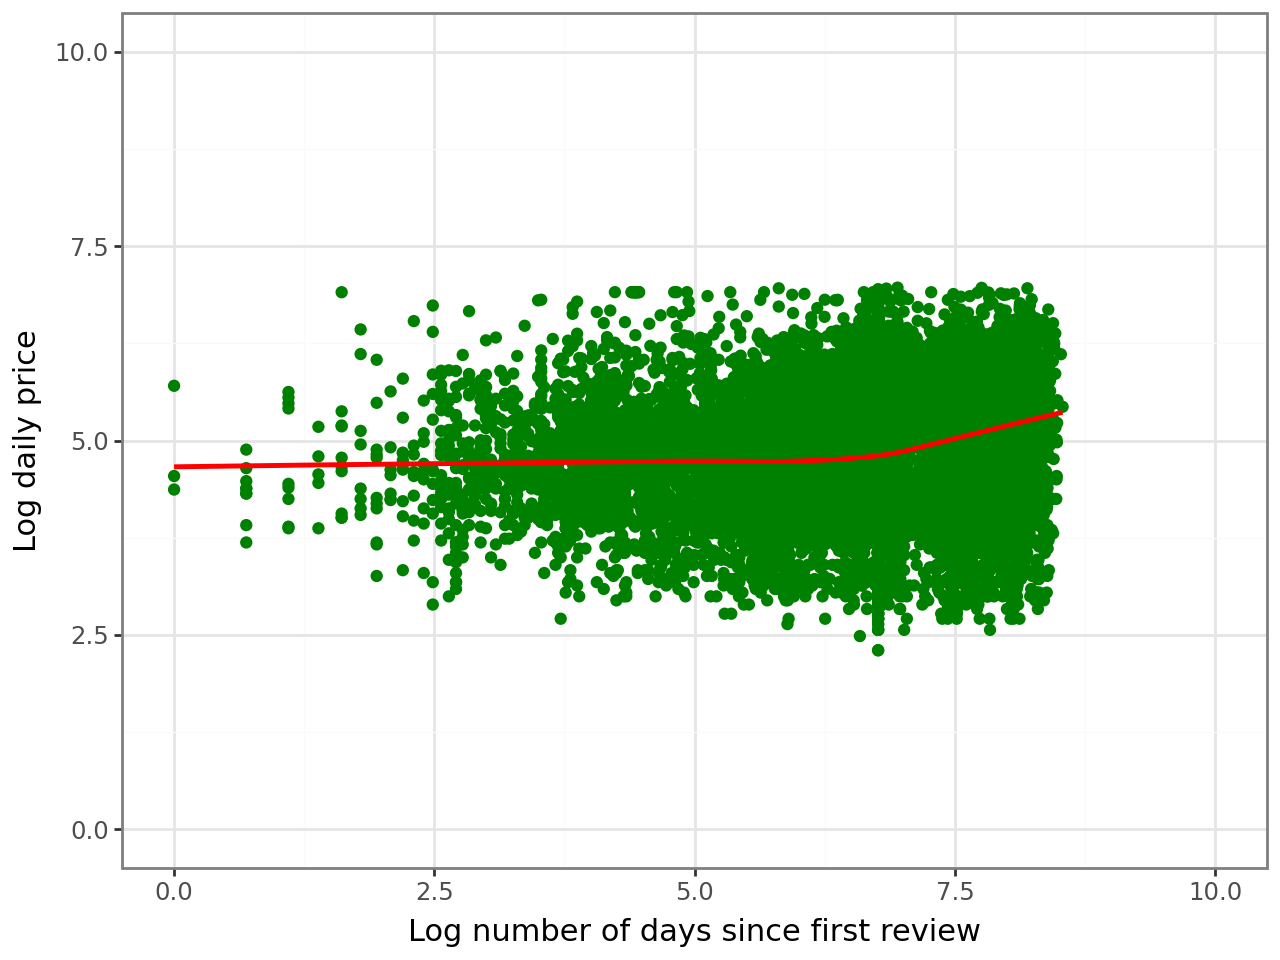

In [68]:
(
    ggplot(data, aes(x="ln_days_since", y="ln_price"))
    + geom_point(size=1.5, colour='green')
    + ylim(0, 10)
    + xlim(0, 10)
    + geom_smooth(method="lowess", colour='red', se=False)
    + labs(x="Log number of days since first review", y="Log daily price")
    + theme_bw()
)


In [69]:
data.n_review_scores_rating.describe()

count    15063.000000
mean         4.614855
std          0.427613
min          1.000000
25%          4.520000
50%          4.700000
75%          4.830000
max          5.000000
Name: n_review_scores_rating, dtype: float64

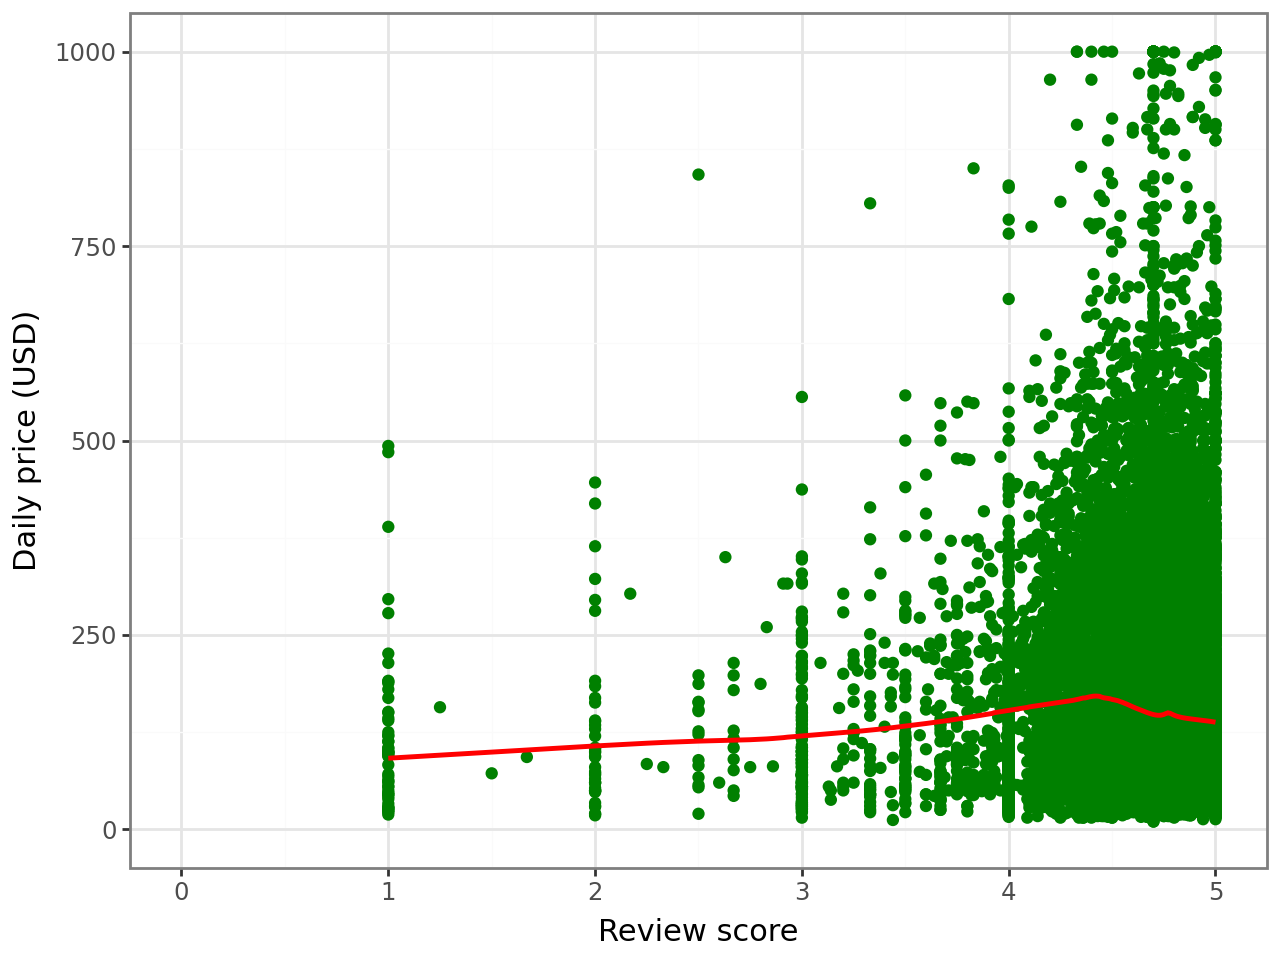

In [70]:
## review score effect
(
    ggplot(data, aes(x="n_review_scores_rating", y="price"))
    + geom_point(size=1.5, colour='green')
    + ylim(0, 1000)
    + xlim(0, 5)
    + geom_smooth(method="lowess", colour='red', se=False)
    + labs(x="Review score", y="Daily price (USD)")
    + theme_bw()
)


In [71]:
data["ln_review_scores_rating"] = np.log(data["n_review_scores_rating"])


In [72]:
# Regression 1) ln price - num of review scores
smf.ols(formula="ln_price ~ n_review_scores_rating", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.996
Date:                Sun, 02 Mar 2025   Prob (F-statistic):              0.158
Time:                        22:38:09   Log-Likelihood:                -18804.
No. Observations:               15063   AIC:                         3.761e+04
Df Residuals:                   15061   BIC:                         3.763e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.7487      0.074     63.769      0.000       4.603       4.895
n_review_scores_rating     0.0227      0.016      1.413      0.158      -0.009       0.054
==============================================================================
Omnibus:                      466.950   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.812
Skew:                          -0.145   Prob(JB):                     2.83e-56
Kurtosis:                       2.432   Cond. No.                         52.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Regression 2) ln price - log num of review scores

smf.ols(formula="ln_price ~ ln_review_scores_rating", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.853
Date:                Sun, 02 Mar 2025   Prob (F-statistic):            0.00508
Time:                        22:38:09   Log-Likelihood:                -18801.
No. Observations:               15063   AIC:                         3.761e+04
Df Residuals:                   15061   BIC:                         3.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.6290      0.080     57.600      0.000       4.471       4.787
ln_review_scores_rating     0.1474      0.053      2.802      0.005       0.044       0.250
==============================================================================
Omnibus:                      467.736   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.522
Skew:                          -0.146   Prob(JB):                     1.98e-56
Kurtosis:                       2.432   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
## minimum nights
smf.ols(formula="ln_price ~ n_minimum_nights", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     3558.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:38:09   Log-Likelihood:                -17207.
No. Observations:               15063   AIC:                         3.442e+04
Df Residuals:                   15061   BIC:                         3.443e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.1214      0.008    670.320      0.000       5.106       5.136
n_minimum_nights    -0.0178      0.000    -59.648      0.000      -0.018      -0.017
==============================================================================
Omnibus:                     3686.592   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65875.591
Skew:                           0.712   Prob(JB):                         0.00
Kurtosis:                      13.146   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
bins = [1,2,3,max(data.n_minimum_nights)]
labels = [1,2,3]
data["f_minimum_nights"] = pd.cut(data["n_minimum_nights"], bins = bins, labels = labels, right = False)

In [76]:
## minimum nights
smf.ols(formula="ln_price ~ f_minimum_nights", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     1419.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:38:09   Log-Likelihood:                -17503.
No. Observations:               15062   AIC:                         3.501e+04
Df Residuals:                   15059   BIC:                         3.504e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.2870      0.012    449.585      0.000       5.264       5.310
f_minimum_nights[T.2]    -0.0551      0.023     -2.408      0.016      -0.100      -0.010
f_minimum_nights[T.3]    -0.7020      0.014    -49.216      0.000      -0.730      -0.674
==============================================================================
Omnibus:                      207.648   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.793
Skew:                          -0.064   Prob(JB):                     1.08e-28
Kurtosis:                       2.566   Cond. No.                         4.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
data.groupby("room_type").agg(mean_price=("price", np.mean), n=("price", "size"))


,mean_price,n
room_type,,
Entire home/apt,218.890760,10216
Hotel room,273.774194,62
Private room,91.494644,4668
Shared room,95.777778,117


In [78]:
inf = data.isin([np.inf, -np.inf]).sum()
inf[inf > 0]


ln_beds    1753
dtype: int64

In [79]:
data = data.replace([np.inf, -np.inf], np.nan)


In [80]:
data.isnull().sum().loc[lambda x: x > 0]

ln_beds                1753
f_bathroom                2
f_number_of_reviews       1
f_minimum_nights          1
dtype: int64

In [81]:
data.to_csv("cleaned_data_barca4.csv", index=False)
